<a href="https://colab.research.google.com/github/chrisnelsonlab/BMEG4623/blob/master/2_Transport_FluidModels_plus_ChatGPTcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src=https://brand.uark.edu/_resources/images/UA_Logo_Horizontal.jpg width="400" height="96">

####BMEG 4623 - Tranposrt phenomenon in biomedical engineering
####For more information, check out the Nelson lab for Therapeutic Genome Engineering (https://nelsonlab.uark.edu/)

For image credits, see the linked URL

#1. Introduction

The goal for today is to develop five models for biological fluids

Last class, we derived the constituitive equation relating shear stress and shear rate:

$$\tau_{yx} = -\eta \, \dot{\gamma}_{yx}$$

Now let's say we used a viscometer to collect a series of data. Could we model the apparent viscosity $\eta$?


<img src = https://raw.githubusercontent.com/chrisnelsonlab/BMEG4623/refs/heads/master/Images/fluidmodels.png>

# 2.Outline

To understand biological fluid flow, we will examine the variation of shear rate with shear stress.

Generally, we can write a relationship between shear stress and shear rate as:

$$\tau_{yx} = -\eta \, \dot{\gamma}_{yx}$$

In this case $\eta$ could be a function of shear stress or shear rate:

$$\eta \stackrel{?}{=} f(\tau_{yx}, \dot{\gamma}_{yx})$$

If it is not a function of shear stress or shear rate and is a constant value, then we can write it as:

$$\tau_{yx} = -\mu \, \dot{\gamma}_{yx}$$

Where $\mu$ is constant value for viscosity and the fluid is newtonian

Let's use the following example data set:

| Shear Rate (1/s) | Apparent Viscosity (cP) |
|------------------|--------------------------|
| 0.1              | 354.8                   |
| 0.5              | 146.4                   |
| 1                | 100.0                   |
| 5                | 41.3                    |
| 10               | 28.2                    |
| 50               | 11.6                    |
| 100              | 7.9                     |
| 500              | 3.3                     |
| 1000             | 2.2                     |


What can we tell right away about this sample?

Question: Is the viscosity constant?

<details>
  <summary>Click here to reveal the answer</summary>

No, you can tell the viscosity changes with respect to sheaer rate. That would rule out a Newtonian Fluid.
</details>

<b>Let's try out plotting this as a Newtonian Fluid anyway.</b>




# 3. Newtonian Fluids


For Newtonian Fluids, recall:
$$\tau_{yx} = -\mu \, \dot{\gamma}_{yx}$$

Where $\mu$ is constant.

So if we plotted the data in the Table above as X values = Shear rate and y values as shear stress, the slope would be $\mu$.

We need to first solve for shear stress, using:

$$\tau_{yx} = -\eta \, \dot{\gamma}_{yx}$$

Note the units of centipoise, which is also a milliPascal*second. Multilying by shear rate gives us mPa

| Shear Rate (1/s) | Apparent Viscosity (cP) | Shear Stress $\tau_{yx}$ (mPa) |
|------------------|--------------------------|--------------------------------|
| 0.1              | 354.8                   | 35.48                          |
| 0.5              | 146.4                   | 73.2                           |
| 1                | 100.0                   | 100.0                          |
| 5                | 41.3                    | 206.5                          |
| 10               | 28.2                    | 282.0                          |
| 50               | 11.6                    | 580.0                          |
| 100              | 7.9                     | 790.0                          |
| 500              | 3.3                     | 1650.0                         |
| 1000             | 2.2                     | 2200.0                         |




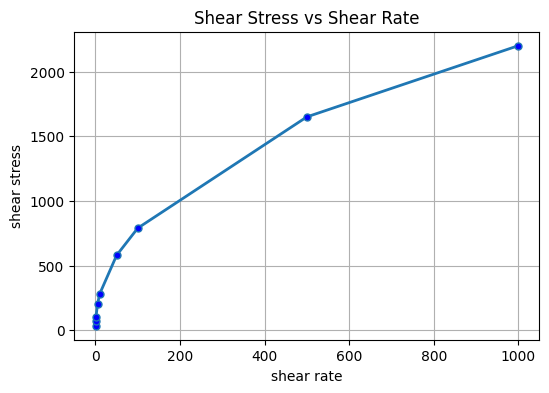

u0 (slope): 2.1396679247175685
t_y (intercept): 261.2454929628557


In [ ]:
# Characterize viscosity properties of unknown fluid sample
# Is the sample Newtonian?

import numpy as np
import matplotlib.pyplot as plt

# Define fluid and viscometer properties
film_thickness = 0.1  # mm

# Experimental data
shear_rate = np.array([0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000])
apparent_viscosity = np.array([354.8, 146.4, 100, 41.3, 28.2, 11.6, 7.9, 3.3, 2.2])

# Calculate shear stress
shear_stress = apparent_viscosity * shear_rate

# Initial plot
plt.figure(figsize=(6,4))
plt.plot(shear_rate, shear_stress, 'o-', linewidth=2, markersize=5, markerfacecolor='b')
plt.xlabel("shear rate")
plt.ylabel("shear stress")
plt.title("Shear Stress vs Shear Rate")
plt.grid(True)
plt.show()

# Linear regression on log-log data (equivalent to polyfit in MATLAB)
coeffs = np.polyfit((shear_rate), (shear_stress), 1)
u0 = coeffs[0]   # slope
t_y = coeffs[1]  # intercept

print("u0 (slope):", u0)
print("t_y (intercept):", t_y)

# 3.1 Newtonian Conclusion

So this fluid is clearly not Newtonian. We might note that the fluid seems to originate very close to the origin (0,0). It also has shear thinning like behavior (higher shear stress give a larger shear rate).



#4.Bingham Fluid

A Bingham fluid would have a critical shear followed by a linear slope.

The graph above does not satisfy either of these criteria, the interecept seems to be very close to the origin and the slope is not constant.




#5. Power Law

A power law fluid is characterized by a linear plot in a log-log plot. The relationship looks like


$$\tau_{yx} = -K \, \lvert \frac{dv_x}{dy} \rvert^{n-1} \, \frac{dv_x}{dy}$$

Where


$$\eta = -K \, \lvert \frac{dv_x}{dy} \rvert^{n-1} \,$$

That leaves two paramaters to solve: K and n

```
K is known as the flow consistency index

and n is known as the behavior index or power law index
```


**We can translate to log-log space to allow us to solve for both with enough data**

Note that if n=1, the equation collapses to a Newtonian fluid with a slope of K

So, a Newtonian fluid could be considered a special case of a Power Law Fluid

To graph, we need to take the log of each side

$$log(\tau_{yx})$$

and

$$log(-K \, \lvert \frac{dv_x}{dy} \rvert^{n-1} \, \frac{dv_x}{dy})$$

or

$$n*log(-K \, \lvert \frac{dv_x}{dy} \rvert \, \dot{\gamma}_{yx})$$

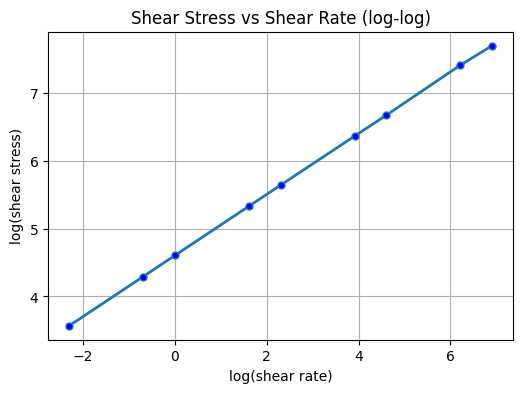

slope: 0.4491596411152022
intercept: 4.6053522471499075
Power law index n =  0.4491596411152022
Flow consistency index K =  100.01820777359553


In [ ]:
# Characterize viscosity properties of unknown fluid sample

import numpy as np
import matplotlib.pyplot as plt

# Define fluid and viscometer properties
film_thickness = 0.1  # mm

# Experimental data
shear_rate = np.array([0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000])
apparent_viscosity = np.array([354.8, 146.4, 100, 41.3, 28.2, 11.6, 7.9, 3.3, 2.2])

# Calculate shear stress
shear_stress = apparent_viscosity * shear_rate

# Initial plot
plt.figure(figsize=(6,4))
plt.plot(np.log(shear_rate), np.log(shear_stress), 'o-', linewidth=2, markersize=5, markerfacecolor='b')
plt.xlabel("log(shear rate)")
plt.ylabel("log(shear stress)")
plt.title("Shear Stress vs Shear Rate (log-log)")
plt.grid(True)
plt.show()

# Linear regression on log-log data (equivalent to polyfit in MATLAB)
coeffs = np.polyfit(np.log(shear_rate), np.log(shear_stress), 1)
slp = coeffs[0]   # slope
itc = coeffs[1]  # intercept

print("slope:", slp)
print("intercept:", itc)

#For a power law model:

print('Power law index n = ',slp)
K_value = np.exp(itc)
print('Flow consistency index K = ',K_value)



# 6. Casson Fluid

A casson fluid will have viscosity that varies with shear stress and shear rate that will produce a straight line on a sqrt-sqrt graph:



$$\sqrt{\displaystyle \left(\tau_{yx}\right)}=\sqrt{\displaystyle \left(\eta\dot\gamma \right)}$$

If we allow $\sqrt(\eta)$ to be the slope $S$, that gives us

$$\sqrt{\displaystyle \left(\tau_{yx}\right)}=S\sqrt{\displaystyle \left(\dot\gamma \right)}$$

Now we can transform the data and plot









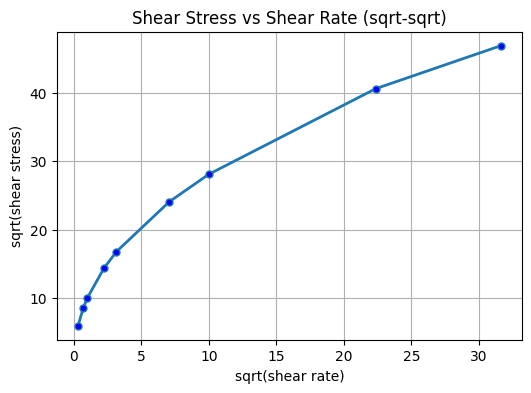

slope: 1.2647116785450068
intercept: 10.682208627925041
Slope factor 1.2647116785450068
Tau_y =  114.1095811705162


In [ ]:
# Characterize viscosity properties of unknown fluid sample

import numpy as np
import matplotlib.pyplot as plt

# Define fluid and viscometer properties
film_thickness = 0.1  # mm

# Experimental data
shear_rate = np.array([0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000])
apparent_viscosity = np.array([354.8, 146.4, 100, 41.3, 28.2, 11.6, 7.9, 3.3, 2.2])

# Calculate shear stress
shear_stress = apparent_viscosity * shear_rate

# Initial plot
plt.figure(figsize=(6,4))
plt.plot(np.sqrt(shear_rate), np.sqrt(shear_stress), 'o-', linewidth=2, markersize=5, markerfacecolor='b')
plt.xlabel("sqrt(shear rate)")
plt.ylabel("sqrt(shear stress)")
plt.title("Shear Stress vs Shear Rate (sqrt-sqrt)")
plt.grid(True)
plt.show()

# Linear regression on log-log data (equivalent to polyfit in MATLAB)
coeffs = np.polyfit(np.sqrt(shear_rate), np.sqrt(shear_stress), 1)
slp = coeffs[0]   # slope
itc = coeffs[1]  # intercept

print("slope:", slp)
print("intercept:", itc)

#For a Casson model:

print('Slope factor',slp)
Tau_Y = itc*itc
print('Tau_y = ',Tau_Y)

# 7. Herschel-Bulkley Fluid

The last model is the Herschel-Bulkley model which is the most flexible of the models. It has three parameters for fitting the data. It has a form:

$$\tau_{yx} = -K \, \lvert \frac{dv_x}{dy} \rvert^{n} \, + \tau_y$$

The model combines the nonlinear behavior of a power law fluid with a yield stress characteristic of Casson or Bingham Fluids.

To fit 3 parameters, we will need to come up with an initial estimate of tau_y. However, we can't measure shear stress when shear rate is 0.

The previous data was a power law model, let's try data that may fit the HB model better.

We have an unkown sample in a sliding plate viscometer with a height of 0.1 mm.
We are given the following data

| tau_yx (dynes/cm2) | V (mm/s) |
|------------------|--------------------------|
| 40              | 0.01                  |
| 81.6              | 0.05                   |
| 120.0                | 0.1                   |
| 328.5                | 0.5                    |
| 521.2               | 1                    |
| 834.2               | 2                    |


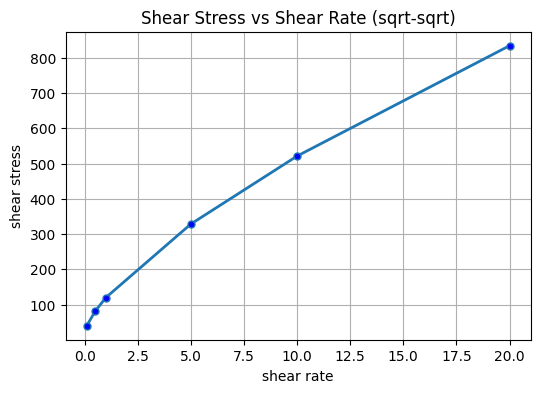

In [ ]:
#Let's do an intial plot (Newtonian plot)

import numpy as np
import matplotlib.pyplot as plt

# Define fluid and viscometer properties
film_thickness = 0.1  # mm

# Experimental data
velocity = np.array([0.01, 0.05, 0.1, 0.5, 1, 2])
shear_stress = np.array([40, 81.6, 120, 328.5, 521.2, 834.2])

#calculate shear rate, which is the velocity divided by the film thickness
shear_rate = velocity/film_thickness

plt.figure(figsize=(6,4))
plt.plot(shear_rate, shear_stress, 'o-', linewidth=2, markersize=5, markerfacecolor='b')
plt.xlabel("shear rate")
plt.ylabel("shear stress")
plt.title("Shear Stress vs Shear Rate")
plt.grid(True)
plt.show()



#7.1 HB continued

Note the offset of a little less than 40. We can make a guess that the offset tau_y is about 40. Probably less than 20, so we will need to guess and check around that point.

/tmp/ipython-input-4074190428.py:9: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(x_values), np.log(y_values), 'o-', linewidth=2, markersize=5, markerfacecolor='b')


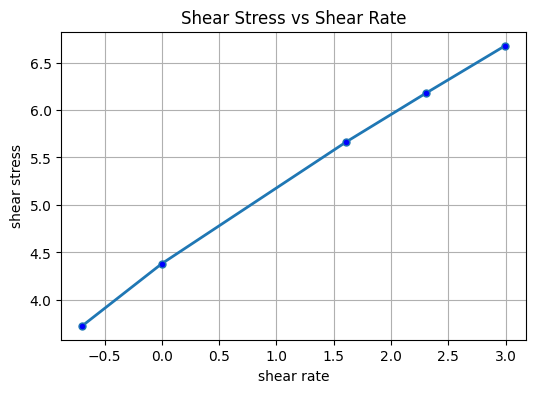

In [ ]:
critical_value = 0.01
error =1
Tau_Y = 40 #guess

y_values = shear_stress - Tau_Y
x_values = shear_rate

plt.figure(figsize=(6,4))
plt.plot(np.log(x_values), np.log(y_values), 'o-', linewidth=2, markersize=5, markerfacecolor='b')
plt.xlabel("shear rate")
plt.ylabel("shear stress")
plt.title("Shear Stress vs Shear Rate")
plt.grid(True)
plt.show()



#7.2 HB continued

So we can tell it is not quite linear. Also notice the error for dividing by 0. We could guess again?

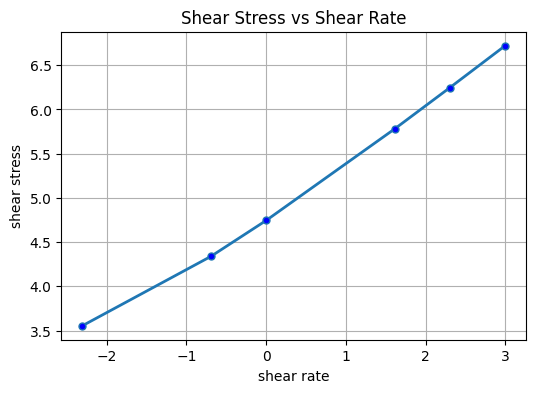

In [ ]:
critical_value = 0.01
error =1
Tau_Y = 5 #guess

y_values = shear_stress - Tau_Y
x_values = shear_rate

plt.figure(figsize=(6,4))
plt.plot(np.log(x_values), np.log(y_values), 'o-', linewidth=2, markersize=5, markerfacecolor='b')
plt.xlabel("shear rate")
plt.ylabel("shear stress")
plt.title("Shear Stress vs Shear Rate")
plt.grid(True)
plt.show()


# 7.3 HB Continued

Looks like we overshot, so the value must be somewhere between 5 and 40.

Could you make a loop that converged on the best fit?

# 8. Homework Problem 4

### A. **Estimate the viscosity** for the carrier fluid (100% ethanol) using your companies sliding plate viscometer. Ethanol behaves as a Newtonian fluid in the range of temperatures and pressure for this experiment. The area of the sliding plate viscometer is 0.2 m2, the height is 0.1 mm, the measured force is 32 mN and the steady-state velocity reached is 2 cm/s. The experiment is performed at 37°C. Give your answer in mPa*s.





### B. **Testing polymer samples** You now receive 5 polymer samples and would like to closely mimic the viscosity of blood a Casson fluid with properties: $\tau_y = 3.0 mPa·s$ and $S = 2.21 (mPa·s)^{1/2}$.

### After the polymer is added, you collect the following data for viscosity on cone-and-plate viscometer. You collect apparent viscosity data as a function of shear rate (see table). What type of fluid does each represent (e.g. Newtonian or something else)?

### Apparent Viscosity (η, mPa·s) at Various Shear Rates (γ̇, s⁻¹)


| Shear Rate (s⁻¹) | S1 (mPa·s) | S2 (mPa·s)     | S3  (mPa·s)     | S4  (mPa·s)   | S5 (mPa·s)    |
|------------------|-------|-------|--------|-------|-------|
| 0.1              | 59.09 | 3.76  | 804.48 | 1505  | 354.8 |
| 0.5              | 21.71 | 3.79  | 162.55 | 305   | 146.4 |
| 1                | 15.53 | 3.78  | 82     | 155   | 100   |
| 5                | 8.9   | 3.85  | 17.14  | 35    | 41.3  |
| 10               | 7.6   | 3.85  | 8.89   | 20    | 28.2  |
| 50               | 6.02  | 3.81  | 2.11   | 8     | 11.6  |
| 100              | 5.67  | 3.79  | 1.2    | 6.5   | 7.9   |
| 500              | 5.23  | 3.81  | 0.39   | 5.3   | 3.3   |
| 1000             | 5.12  | 3.84  | 0.26   | 5.2   | 2.2   |


### C. **Which fluid would you choose?** What are the viscous properties? Describe your modelling approach and reasoning.

### Upload your solution as a word document or pdf into blackboard. If you use code here, you can copy the code or share your work book. Remmber that homework is participation only, so sharing code is not necessary unless you want to provide the added context. Graphs generated from your code can be copied into a document.

Best Fit Parameters:
 K = 99.9417, n = 0.7002, tau_y = 20.0804, R^2 = 1.0000


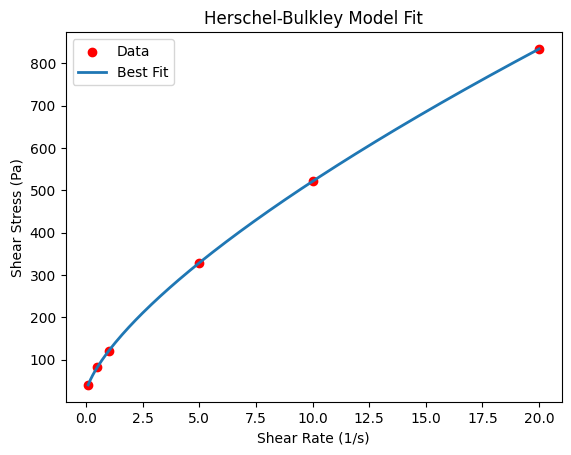

In [4]:
#Source: ChatGPT
#Prompt: I want a python script (that can run in google colab)
#that optimizes an R-squared line. I'm specifically using shear
#stress vs shear rate data for the Hershel Bulkley model if you are familiar.
#I want to iterate on an offset shear until I get the best fit line

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Example Data (replace with your own)
# -----------------------------
#shear_rate = np.array([1, 2, 5, 10, 20, 50, 100])  # 1/s
#shear_stress = np.array([5.2, 7.1, 12.4, 20.5, 32.1, 70.4, 130.2])  # Pa


velocity = np.array([0.01, 0.05, 0.1, 0.5, 1, 2])
shear_stress = np.array([40, 81.6, 120, 328.5, 521.2, 834.2])
film_thickness = 0.1  # mm

#calculate shear rate, which is the velocity divided by the film thickness
shear_rate = velocity/film_thickness

# -----------------------------
# Herschel-Bulkley model definition
# -----------------------------
def herschel_bulkley(gamma_dot, K, n, tau_y):
    return tau_y + K * gamma_dot**n

# -----------------------------
# Function to compute R^2
# -----------------------------
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# -----------------------------
# Grid search over yield stress offsets
# -----------------------------
tau_y_candidates = np.linspace(0, min(shear_stress)*0.9, 200)  # search range

best_r2 = -np.inf
best_params = None

for tau_y_guess in tau_y_candidates:
    try:
        # Fit K and n with tau_y fixed
        def model_fixed(gamma_dot, K, n):
            return herschel_bulkley(gamma_dot, K, n, tau_y_guess)

        popt, _ = curve_fit(model_fixed, shear_rate, shear_stress, p0=[1, 1])

        # Predict values
        y_pred = model_fixed(shear_rate, *popt)
        r2 = r_squared(shear_stress, y_pred)

        if r2 > best_r2:
            best_r2 = r2
            best_params = (popt[0], popt[1], tau_y_guess)

    except RuntimeError:
        # Skip failed fits
        continue

K_best, n_best, tau_y_best = best_params
print(f"Best Fit Parameters:\n K = {K_best:.4f}, n = {n_best:.4f}, tau_y = {tau_y_best:.4f}, R^2 = {best_r2:.4f}")

# -----------------------------
# Plot results
# -----------------------------
gamma_fit = np.linspace(min(shear_rate), max(shear_rate), 200)
tau_fit = herschel_bulkley(gamma_fit, K_best, n_best, tau_y_best)

plt.scatter(shear_rate, shear_stress, color='red', label='Data')
plt.plot(gamma_fit, tau_fit, label='Best Fit', linewidth=2)
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Shear Stress (Pa)')
plt.legend()
plt.title('Herschel-Bulkley Model Fit')
plt.show()


Best Fit Parameters:
 K = 99.9417, n = 0.7002, tau_y = 20.0804, R^2 = 1.0000


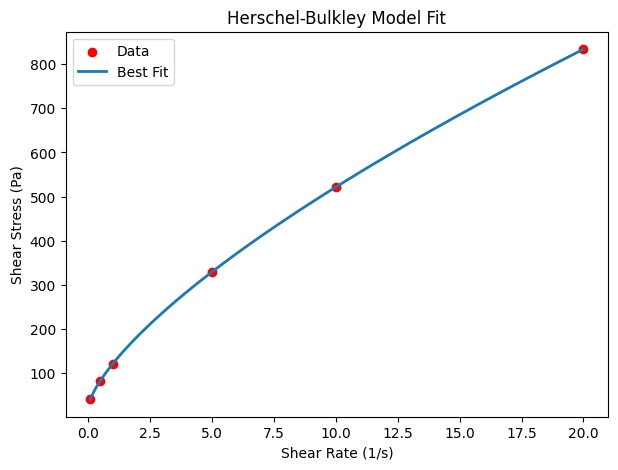

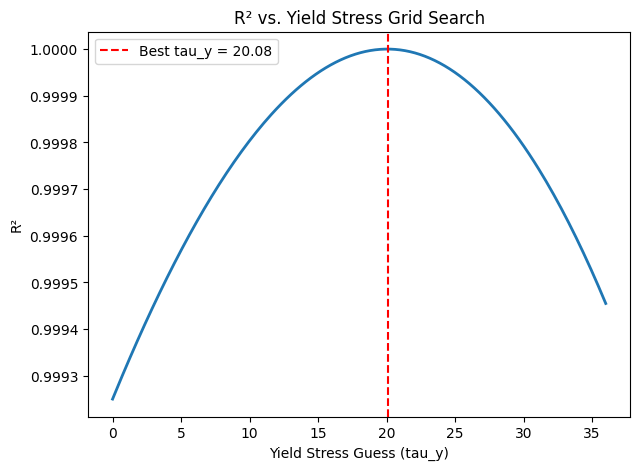

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -----------------------------
# Example Data (replace with your own)
# -----------------------------
#shear_rate = np.array([1, 2, 5, 10, 20, 50, 100])  # 1/s
#shear_stress = np.array([5.2, 7.1, 12.4, 20.5, 32.1, 70.4, 130.2])  # Pa



velocity = np.array([0.01, 0.05, 0.1, 0.5, 1, 2])
shear_stress = np.array([40, 81.6, 120, 328.5, 521.2, 834.2])
film_thickness = 0.1  # mm
shear_rate = velocity/film_thickness


# -----------------------------
# Herschel-Bulkley model definition
# -----------------------------
def herschel_bulkley(gamma_dot, K, n, tau_y):
    return tau_y + K * gamma_dot**n

# -----------------------------
# Function to compute R^2
# -----------------------------
def r_squared(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

# -----------------------------
# Grid search over yield stress offsets
# -----------------------------
tau_y_candidates = np.linspace(0, min(shear_stress)*0.9, 200)  # search range

best_r2 = -np.inf
best_params = None
r2_values = []

for tau_y_guess in tau_y_candidates:
    try:
        # Fit K and n with tau_y fixed
        def model_fixed(gamma_dot, K, n):
            return herschel_bulkley(gamma_dot, K, n, tau_y_guess)

        popt, _ = curve_fit(model_fixed, shear_rate, shear_stress, p0=[1, 1])

        # Predict values
        y_pred = model_fixed(shear_rate, *popt)
        r2 = r_squared(shear_stress, y_pred)
        r2_values.append(r2)

        if r2 > best_r2:
            best_r2 = r2
            best_params = (popt[0], popt[1], tau_y_guess)

    except RuntimeError:
        # Skip failed fits
        r2_values.append(np.nan)
        continue

K_best, n_best, tau_y_best = best_params
print(f"Best Fit Parameters:\n K = {K_best:.4f}, n = {n_best:.4f}, tau_y = {tau_y_best:.4f}, R^2 = {best_r2:.4f}")

# -----------------------------
# Plot results: Data + Best Fit
# -----------------------------
gamma_fit = np.linspace(min(shear_rate), max(shear_rate), 200)
tau_fit = herschel_bulkley(gamma_fit, K_best, n_best, tau_y_best)

plt.figure(figsize=(7,5))
plt.scatter(shear_rate, shear_stress, color='red', label='Data')
plt.plot(gamma_fit, tau_fit, label='Best Fit', linewidth=2)
plt.xlabel('Shear Rate (1/s)')
plt.ylabel('Shear Stress (Pa)')
plt.legend()
plt.title('Herschel-Bulkley Model Fit')
plt.show()

# -----------------------------
# Plot R² vs Yield Stress
# -----------------------------
plt.figure(figsize=(7,5))
plt.plot(tau_y_candidates, r2_values, '-', linewidth=2)
plt.axvline(tau_y_best, color='red', linestyle='--', label=f'Best tau_y = {tau_y_best:.2f}')
plt.xlabel('Yield Stress Guess (tau_y)')
plt.ylabel('R²')
plt.title('R² vs. Yield Stress Grid Search')
plt.legend()
plt.show()
